In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-fp-converge)

We revisit {numref}`Demo %s <demo-fp-spiral>` and investigate the observed convergence more closely. Recall that above we calculated $g'(p)\approx-0.42$ at the convergent fixed point.

In [2]:
using Polynomials
p = Polynomial([3.5, -4, 1])
r = roots(p)
rmin, rmax = extrema(r)
@show rmin, rmax;

(rmin, rmax) = (1.2928932188134525, 2.7071067811865475)

Here is the fixed-point iteration. This time we keep track of the whole sequence of approximations.

:::{index} Julia; push!
:::

In [3]:
g(x) = x - p(x)
x = [2.1]
for k = 1:12
    push!(x, g(x[k]))
end
x

13-element Vector{Float64}:
 2.1
 2.59
 2.7419000000000002
 2.69148439
 2.713333728386328
 2.7044887203327885
 2.7081843632566587
 2.7066592708954196
 2.7072919457529734
 2.7070300492259465
 2.707138558717502
 2.707093617492436
 2.7071122335938966

It's illuminating to construct and plot the sequence of errors.

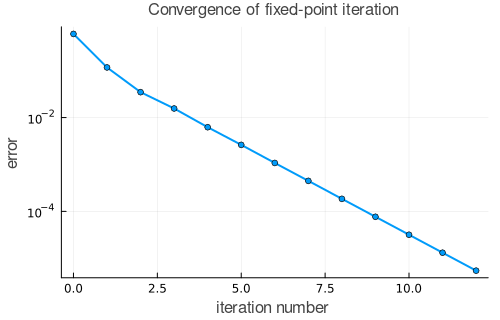

In [4]:
err = @. abs(x - rmax)
plot(0:12, err;
    m=:o,
    xaxis=("iteration number"),  yaxis=("error", :log10),
    title="Convergence of fixed-point iteration")

It's quite clear that the convergence quickly settles into a linear rate. We could estimate this rate by doing a least-squares fit to a straight line. Keep in mind that the values for small $k$ should be left out of the computation, as they don't represent the linear trend.

In [5]:
y = log.(err[5:12])
p = Polynomials.fit(5:12, y, 1)

Polynomial(-0.6680573888302035 - 0.8807181589734457*x)

We can exponentiate the slope to get the convergence constant $\sigma$.

In [6]:
σ = exp(p.coeffs[2])

0.4144851385485472

The error should therefore decrease by a factor of $\sigma$ at each iteration. We can check this easily from the observed data.

In [7]:
[err[i+1] / err[i] for i in 8:11]

4-element Vector{Float64}:
 0.4137660520817109
 0.4143987269383
 0.4141368304124451
 0.4142453399049934

The methods for finding $\sigma$ agree well.